<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Code" data-toc-modified-id="Code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Code</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span></li></ul></div>

# Code
python version --3.7.6  

runtime on my pc: 88.3074s

In [1]:
# all paths
all_file_path = ["King James Bible.txt",
             "The Jungle Book.txt",
                "SETIMES.bg-tr.bg",
                "SETIMES.bg-tr.tr"]

In [2]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [3]:
# Count and sort in descending order


def count(word_list: list):

    #frequency
    frequency = FreqDist(word_list)
    # rank by frequency
    sorted_frequency = frequency.most_common() 
    
    # 10 words with highest frequency
    
    print("Most Frequent words:")
    for word, count in sorted_frequency[:10]:
        print(f"'{word}': {count}")
    print("\n")
      
    # separate name and frequency but with same order
    y_frequency = [frequency for word, frequency in sorted_frequency]

    # rank as x label
    x_length = np.arange(1,len(y_frequency)+1)
    
    # return 2 numpys.ndarrays
    return x_length, y_frequency



In [4]:
# draw graphs

def draw_2graphs(name, x, y):
    # name is file_path
    # x(numpys.ndarrays) means all x-axis, y(numpys.ndarrays) means all y-axis, (x, y) as points



    plt.figure(figsize=(10,5))
    plt.suptitle(f'Zipf Law in {name}', fontsize = 20, fontweight = 'bold' )
    
    # rank-frequency graph
    plt.subplot(1,2,1)
    plt.plot(x, y, label = "rank-frequency line" )
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.title('Frequency Rank - Frequency')

    
    # logged graph
    plt.subplot(1,2,2)
    plt.loglog(x, y, label='Zipf')
    plt.xlabel('log_rank')
    plt.ylabel('log_frequency')
    
    # straight line
    x_highest = x[0]
    y_highest = y[0]
    x_lowest =  x[-1]
    y_lowest =  y[-1]
    plt.loglog([x_lowest, x_highest], [y_lowest, y_highest], label='Line between 2 points', linestyle='--', color='red')  
    plt.title('Logged Frequency Rank - logged Frequency')
    
    plt.legend()

In [5]:
# load, tokenize and draw

def zipf(all_file_path : list):
    
    # one file one time
    for file_path in all_file_path:
        with open(file_path,encoding='utf-8') as file:
            text = file.read()
            
            # tokenize
            word_only_list = word_tokenize(text)
            
            #count
            wordcount = len(word_only_list)
            print(f"wordcount of {file_path} is {wordcount}")
            
            # get xs and ys for plotting graphs
            x,y = count(word_only_list)
            
            # plot graphs
            draw_2graphs(file_path,x,y)
        

on my old pc, the code below takes around 1m 23s

wordcount of King James Bible.txt is 915494
Most Frequent words:
',': 70573
'the': 62064
'and': 38846
'of': 34427
'.': 26202
'to': 13378
'And': 12847
':': 12697
'that': 12576
'in': 12331


wordcount of The Jungle Book.txt is 66564
Most Frequent words:
',': 4074
'the': 3397
'.': 2464
'and': 2259
'of': 1298
'to': 1232
'''': 1179
'a': 1122
'``': 1096
'he': 875


wordcount of SETIMES.bg-tr.bg is 5012160
Most Frequent words:
',': 297414
'на': 271036
'.': 191673
'в': 130813
'и': 123542
'за': 108292
'да': 91152
'от': 86946
'се': 60106
'е': 52182


wordcount of SETIMES.bg-tr.tr is 4275963
Most Frequent words:
',': 215871
'.': 207360
've': 99241
'bir': 76150
'''': 37382
'``': 36867
'için': 27414
'bu': 21551
'da': 20734
'de': 20608




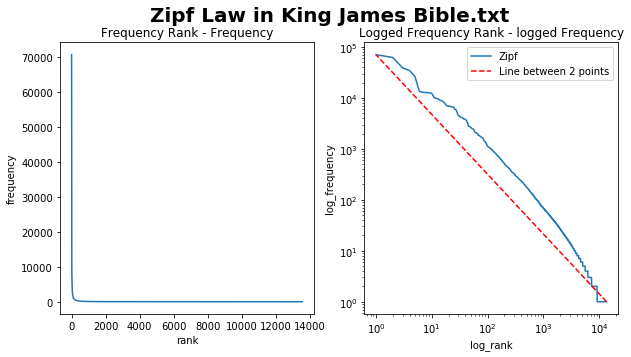

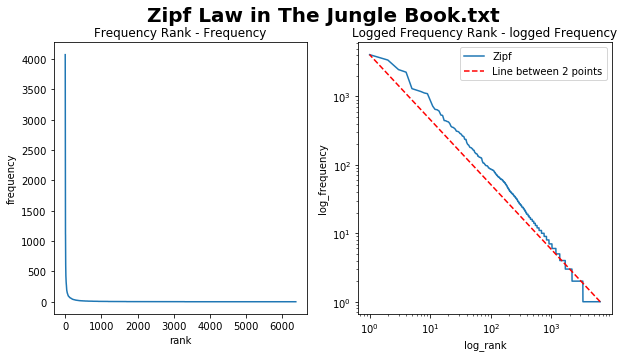

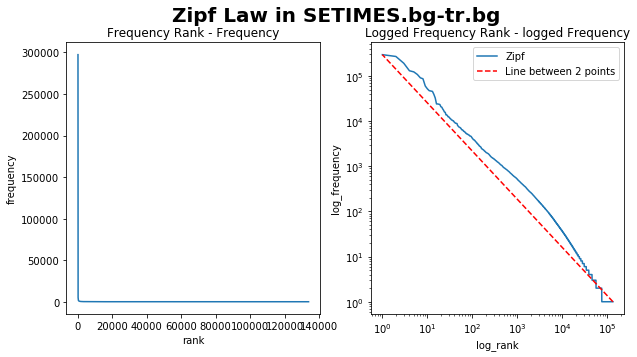

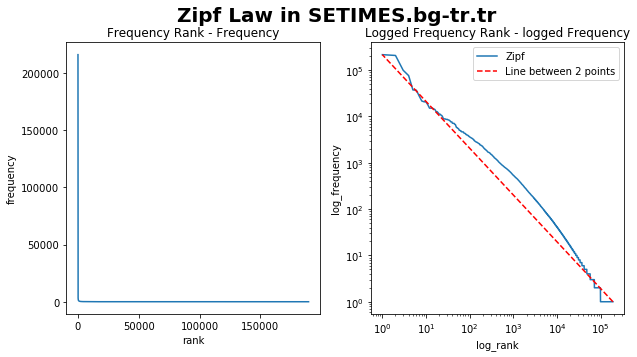

In [6]:
# time: 1m 23s
zipf(all_file_path)

# Analysis


 

In the  rank-frequency graphs, because of the large scale of vocabulary and super high frequency of some words, the line drop down deeply like a vertical line. In the logged ranke-frequency graph, it is obvious, the line is close to a straight line between most frequent and least frequent point.    

If we look at the top 10 frequent words\punctuations in two English texts and another two. These 2 English texts have similar 10 word\punctuations. Actually, when 10 most frequent words in the other 2 languages are translated into English, they are similar to English texts.

Another fun thing is that even the punctuations(in this case, only whitespace used to tokenize) like ',' and '.' follow  Zipf's Law.